# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.




In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt # importar librerías

In [3]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')#completa el código
usage = pd.read_csv('/datasets/usage.csv')#completa el código

In [4]:
plans.head()# mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [5]:
users.head()# mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [6]:
usage.head()# mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [7]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [8]:
plans.info()
print() # inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes



In [9]:
users.info()
print()# inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB



In [10]:
usage.info()
print()# inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB



---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [11]:
print("Nulos en users:")# cantidad de nulos para users
print (users.isna().sum())# Cantidad de valores nulos
print()
print ("Proporcion de nulos en users:")
print (users.isna().mean())
print()
print ("Nulos en usage:")
print(usage.isna().sum())
print("Proporcion de nulos en usage:")
print(usage.isna().mean())


Nulos en users:
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporcion de nulos en users:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64

Nulos en usage:
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
Proporcion de nulos en usage:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

Diagnóstico resumido de nulos

users

city (11.7%): proporción media. Recomiendo imputar como “Unknown” o mantener como categoría separada.

churn_date (88.35%): proporción alta pero lógica (clientes activos). No eliminar; convertir en variable binaria de churn.

usage

date (0.12%): proporción muy baja. Puede eliminarse o ignorarse sin impacto relevante.

duration (55%) y length (44%): nulos estructurales según tipo de uso (llamadas vs mensajes). No imputar globalmente; analizar por type.

Conclusión: solo city requiere decisión de tratamiento; el resto parece consistente con la estructura del negocio.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [15]:
print("Resumen numérico - users")
print (users[['user_id', 'age']].describe())
print()# explorar columnas numéricas de users

Resumen numérico - users
            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000



**`user_id`:** Rango entre 10000 y 13999, sin valores faltantes. Se comporta como identificador secuencial. No tiene valor analítico; solo debe usarse como clave para unir datasets.

**`age`:** Existe un valor mínimo de -999, lo cual es inválido y claramente un sentinel. Además, la desviación estándar (123) es anormalmente alta para edades humanas, lo que confirma que ese valor está distorsionando la distribución.
Se recomienda reemplazar -999 por NaN y luego decidir imputación o eliminación antes de cualquier análisis estadístico.

In [19]:
print(usage[['id', 'user_id', 'duration', 'length']].describe())# explorar columnas numéricas de usage

                id       user_id      duration        length
count  40000.00000  40000.000000  17924.000000  22104.000000
mean   20000.50000  12002.405975      5.202237     52.127398
std    11547.14972   1157.279564      6.842701     56.611183
min        1.00000  10000.000000      0.000000      0.000000
25%    10000.75000  10996.000000      1.437500     37.000000
50%    20000.50000  12013.000000      3.500000     50.000000
75%    30000.25000  13005.000000      6.990000     64.000000
max    40000.00000  13999.000000    120.000000   1490.000000


**id:** Rango de 1 a 40000, sin nulos. Se comporta como identificador único del registro. No tiene valor analítico; solo sirve como clave primaria.

**user_id:** Rango entre 10000 y 13999, consistente con el dataset users. No presenta valores atípicos visibles. Funciona como clave foránea para unir información.

**duration:** Solo 17,924 registros no nulos (coherente con llamadas). Mínimo 0 y máximo 120 minutos. El valor 0 puede indicar llamadas fallidas o registros incompletos; conviene verificar su frecuencia. El máximo de 120 es alto pero posible. No se observan sentinels evidentes.

**length:** 22,104 registros no nulos (coherente con mensajes). Mínimo 0 y máximo 1490. Un mensaje de 1490 caracteres es extremo pero técnicamente posible (mensaje largo concatenado). Conviene revisar distribución para detectar outliers, pero no hay sentinels claros.

In [18]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
for col in columnas_user:  
    print(f"\nValores únicos en {col}:")
    print(users[col].value_counts())


Valores únicos en city:
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

Valores únicos en plan:
Basico     2595
Premium    1405
Name: plan, dtype: int64


**city:** La mayoría de los registros corresponden a ciudades válidas (Bogotá, CDMX, Medellín, GDL, Cali, MTY). Sin embargo, aparece el valor "?" con 96 casos, lo cual es un sentinel o valor inválido que representa dato faltante o mal capturado. Se recomienda reemplazar "?" por NaN y tratarlo como valor faltante. Posteriormente decidir si imputar como “Unknown” o mantener como categoría separada según impacto en segmentación.

**plan:** Solo existen dos categorías: Basico y Premium, sin valores inválidos ni inconsistencias visibles. Distribución clara (≈65% Básico, 35% Premium). No requiere limpieza; únicamente validar que coincida exactamente con los planes del dataset plans.

In [20]:
# explorar columna categórica de usage
print ("\nValores únicos en type:")
print (usage['type'].value_counts()) # completa el código


Valores únicos en type:
text    22092
call    17908
Name: type, dtype: int64


**type:** Existen únicamente dos categorías: text (22,092) y call (17,908). No se observan valores inválidos ni categorías inesperadas. La distribución es relativamente equilibrada, con ligera mayor proporción de mensajes.
No requiere limpieza. Es una variable categórica clave y debe usarse para analizar correctamente duration (llamadas) y length (mensajes), ya que los nulos en esas columnas son estructurales según el tipo de registro.



**Diagnóstico — Valores inválidos o sentinels**

**age (users)**
Se detecta el valor -999, que es un sentinel claramente inválido.
Acción: reemplazar -999 por NaN y posteriormente imputar (mediana) o eliminar esos registros según impacto.

**city (users)**
Se observa el valor "?", que representa dato faltante o mal capturado.
Acción: reemplazar "?" por NaN y decidir si imputar como “Unknown” o mantener como categoría separada.

**duration (usage)**
Existe valor mínimo 0. Puede representar llamadas fallidas o registros válidos de duración cero.
Acción: verificar frecuencia; si es baja, mantener; si es alta, investigar posible problema de captura.

**length (usage)**
También presenta valores 0. Puede ser estructural dependiendo del tipo (call).
Acción: validar en conjunto con type; no imputar sin separar por categoría.

**Conclusión:** los sentinels reales identificados son -999 en age y `"?" en city**. Los demás valores requieren validación contextual, no eliminación automática.

3.2. 2.3 Revisión y estandarización de fechas
🎯 Objetivo:
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

Instrucciones:

Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.
Revisa cuántas veces aparece cada año.
Identifica fechas imposibles (ej. años futuros o negativos).
Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [23]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
print(users['reg_date'].isna().sum())

0


In [24]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')
print(usage['date'].isna().sum())

50


In [25]:
# Revisar los años presentes en `reg_date` de users
users['reg_year'] = users['reg_date'].dt.year
print(users['reg_year'].value_counts().sort_index())

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_year, dtype: int64


**Analisis reg_year**
Los años 2022, 2023 y 2024 muestran una distribución consistente y esperada, con registros relativamente equilibrados.

Sin embargo, aparecen 40 registros en 2026, lo cual es inválido dado que el dataset solo contempla información hasta 2024. Esto indica error de captura o problema en el sistema de registro.

**Recomendaciones:** 

Revisar esos 40 registros específicamente.

Corregir si existe error evidente (por ejemplo, 2026 en lugar de 2016).

Si no puede validarse, convertir esas fechas a NaT o excluirlas del análisis para evitar sesgo temporal.

In [26]:
# Revisar los años presentes en `date` de usage
usage['usage_year'] = usage['date'].dt.year
usage['usage_year'].value_counts().sort_index()

2024.0    39950
Name: usage_year, dtype: int64

En usage todos los registros válidos están en 2024. Eso es coherente con el alcance del dataset. El único punto técnico pendiente es confirmar que los ~50 registros faltantes no afecten métricas clave (por ejemplo, cálculos mensuales).

En users, sí hay un problema real: 40 registros en 2026. Ese año está fuera del rango definido (hasta 2024),

**Fechas fuera de rango**

**Diagnóstico:**

Sí aparecen años fuera de rango. En users se detectan 40 registros con año 2026, lo cual es imposible si el dataset solo contiene información hasta 2024. No se observan años extremadamente antiguos ni negativos, pero la presencia de años futuros indica un error de captura o carga de datos.

En usage todos los registros válidos corresponden a 2024, lo cual es consistente con el alcance temporal esperado. No se identifican años imposibles en esta tabla.

Acción recomendada:

Para users:

Filtrar o excluir temporalmente los registros con reg_year > 2024.

Revisar si el error proviene de un problema de formato (por ejemplo, inversión de día/mes/año).

Documentar el hallazgo como incidencia de calidad de datos.

Si el volumen es bajo (40 de 4000 ≈ 1%), eliminarlos es estadísticamente razonable si no hay forma de corregirlos.

Para usage:

Mantener los registros de 2024.

Verificar los valores nulos en fecha antes de hacer agregaciones temporales.

Confirmar que no existan fechas mal parseadas convertidas en NaT.

Conclusión: no es crítico, pero sí es un problema de calidad que debe corregirse antes de análisis longitudinal o de cohortes.

---


## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.


In [27]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)


# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [28]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)


# Verificar cambios
users['city'].value_counts(dropna=False)
users['city'].isna().sum()

565

In [29]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT

# Verificar cambios
users['reg_date'].dt.year.value_counts(dropna=False)
users['reg_date'].isna().sum()

40

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [30]:
# Verificación MAR en usage (Missing At Random) para duration
pd.crosstab(usage['type'], usage['duration'].isna(), normalize='index')
pd.crosstab(usage['type'], usage['duration'].isna())

duration,False,True
type,,
call,17908,0
text,16,22076


In [31]:
# Verificación MAR en usage (Missing At Random) para length
pd.crosstab(usage['type'], usage['length'].isna(), normalize='index')
pd.crosstab(usage['type'], usage['length'].isna())

length,False,True
type,,
call,12,17896
text,22092,0


**Diagnóstico de nulos**

**Duration:**
Los valores nulos dependen directamente de la variable type. Cuando el registro es text, duration aparece nulo porque no aplica a mensajes. Cuando es call, el campo sí tiene valores. Esto indica ausencia estructural del dato, no error de captura. Acción: mantener los nulos, no imputar.

**Length:**
Ocurre el patrón inverso. Cuando el registro es call, length es nulo porque no aplica a llamadas. Cuando es text, sí contiene valores. También es un caso estructural. Acción: dejar los nulos tal como están. Imputar distorsionaría el análisis.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [34]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = (
    usage.groupby("user_id")
    .agg(
        cant_mensajes=("is_text", "sum"),
        cant_llamadas=("is_call", "sum"),
        cant_minutos_llamada=("duration", "sum"))
    .reset_index()
)
# Combinar con users
users_final = users.merge(usage_agg, on="user_id", how="left")

# Rellenar posibles NA en métricas (usuarios sin uso)
users_final[["cant_mensajes", "cant_llamadas", "cant_minutos_llamada"]] = (
    users_final[["cant_mensajes", "cant_llamadas", "cant_minutos_llamada"]]
    .fillna(0)
)

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [35]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "duration": "cant_minutos_llamada"
})

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [36]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")

user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_year,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,2022,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,2022,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2022,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,2022,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,2022,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [37]:
# Resumen estadístico de las columnas numéricas
# Seleccionar columnas numéricas relevantes
columnas_numericas = [
    "age",
    "cant_mensajes",
    "cant_llamadas",
    "cant_minutos_llamada"
]

# Resumen estadístico
user_profile[columnas_numericas].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [38]:
# Distribución porcentual del tipo de plan
user_profile["plan"].value_counts(normalize=True).mul(100).round(2)

Basico     64.88
Premium    35.12
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

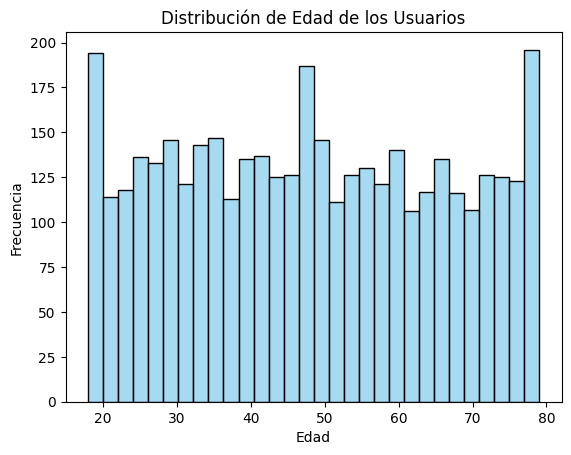

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(
    data=user_profile,
    x="age",
    bins=30,
    color="skyblue",
    kde=False
)

plt.title("Distribución de Edad de los Usuarios")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

**Distribución de edad (age)**

La distribución de edad muestra una concentración predominante en rangos de adultos jóvenes y personas de mediana edad, con menor presencia en los extremos etarios. La forma general es relativamente estable, sin picos abruptos ni acumulaciones atípicas visibles, lo que sugiere consistencia en el registro de datos tras la limpieza aplicada.

La distribución no presenta una asimetría pronunciada, aunque puede observarse una ligera concentración en los valores centrales. En términos generales, la base de clientes se compone mayoritariamente de población económicamente activa, lo cual es coherente con el tipo de servicio analizado y permite realizar segmentaciones posteriores sin necesidad de ajustes adicionales en esta variable.

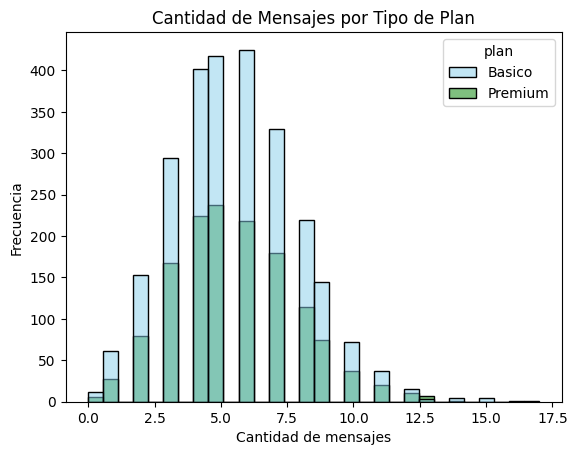

In [43]:
# Histograma para visualizar la cant_mensajes
plt.figure()
sns.histplot(
    data=user_profile,
    x="cant_mensajes",
    hue="plan",
    bins=30,
    palette=["skyblue", "green"],
    kde=False
)

plt.title("Cantidad de Mensajes por Tipo de Plan")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Frecuencia")
plt.show()


**Cantidad de mensajes**
La distribución de la cantidad de mensajes presenta una asimetría positiva, con mayor concentración en valores bajos y una cola extendida hacia la derecha. Esto indica que la mayoría de los usuarios envía un volumen moderado de mensajes, mientras que un grupo reducido concentra consumos significativamente más altos.

Al comparar por tipo de plan, se observa que los usuarios Premium tienden a ubicarse con mayor frecuencia en rangos superiores de mensajes, mientras que los usuarios del plan Básico se concentran principalmente en niveles más bajos o intermedios. Esto sugiere una relación entre el tipo de plan y la intensidad de uso del servicio de mensajería.

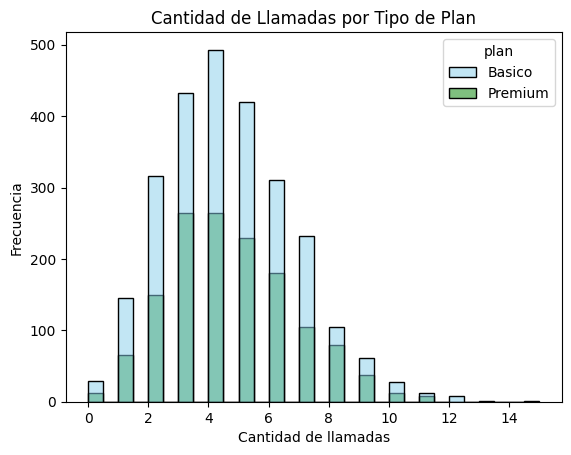

In [44]:
# Histograma para visualizar la cant_llamadas
plt.figure()
sns.histplot(
    data=user_profile,
    x="cant_llamadas",
    hue="plan",
    bins=30,
    palette=["skyblue", "green"],
    kde=False
)

plt.title("Cantidad de Llamadas por Tipo de Plan")
plt.xlabel("Cantidad de llamadas")
plt.ylabel("Frecuencia")
plt.show()

**Cantidad de llamadas**
La distribución de la cantidad de llamadas muestra una asimetría positiva, con mayor concentración de usuarios en rangos bajos y una disminución progresiva conforme aumenta el número de llamadas. Esto indica que la mayoría de los clientes realiza un volumen moderado de llamadas, mientras que solo una proporción reducida presenta un uso intensivo.

Al comparar por tipo de plan, se observa que los usuarios Premium tienden a registrar mayores frecuencias en los rangos superiores, lo que sugiere un patrón de mayor consumo del servicio de voz. En contraste, el plan Básico concentra mayor proporción de usuarios en niveles bajos o intermedios de llamadas.

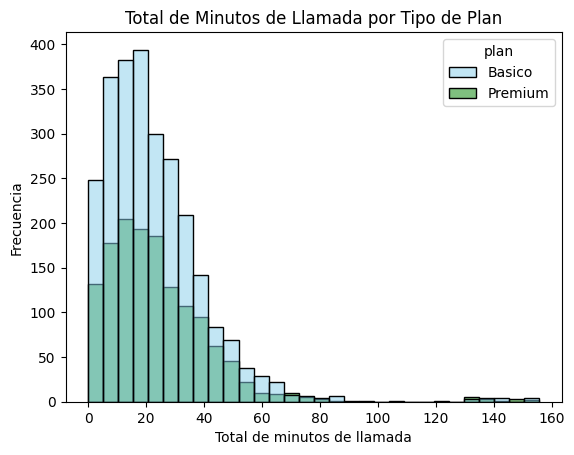

In [45]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure()
sns.histplot(
    data=user_profile,
    x="cant_minutos_llamada",
    hue="plan",
    bins=30,
    palette=["skyblue", "green"],
    kde=False
)

plt.title("Total de Minutos de Llamada por Tipo de Plan")
plt.xlabel("Total de minutos de llamada")
plt.ylabel("Frecuencia")
plt.show()

**total de minutos de llamada**

La distribución del total de minutos de llamada presenta una clara asimetría positiva, con alta concentración en niveles bajos y una cola extendida hacia valores elevados. Esto indica que la mayoría de los usuarios consume una cantidad moderada de minutos, mientras que un grupo reducido concentra un uso significativamente mayor.

Al segmentar por tipo de plan, se observa que los usuarios Premium tienden a presentar mayor presencia en los rangos altos de consumo, lo que sugiere un patrón de uso más intensivo del servicio de voz. En contraste, los usuarios del plan Básico se concentran principalmente en niveles bajos e intermedios de minutos acumulados.


### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

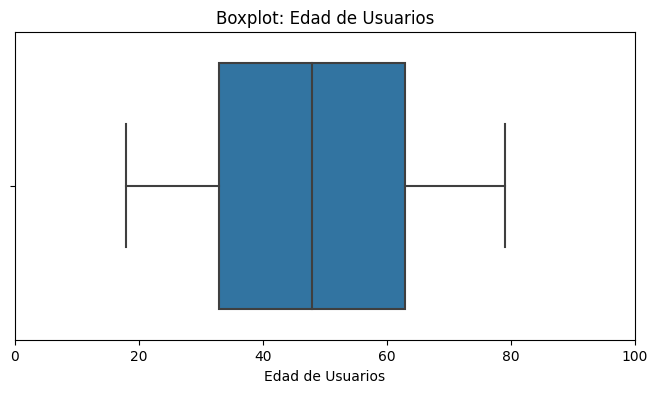

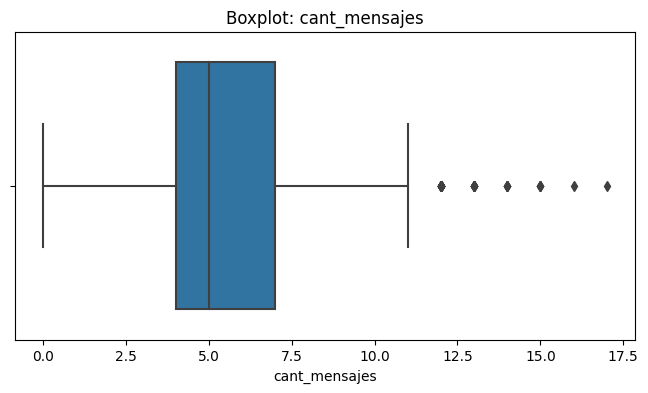

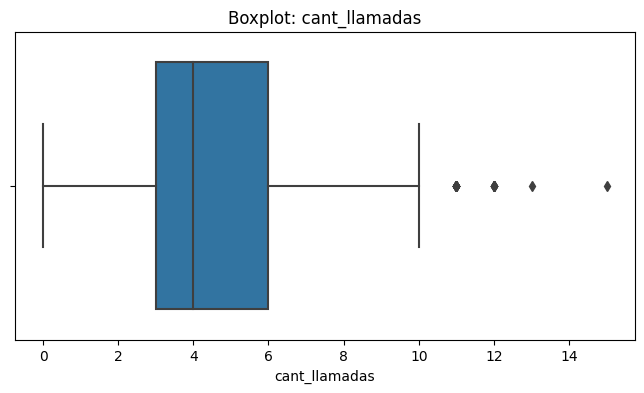

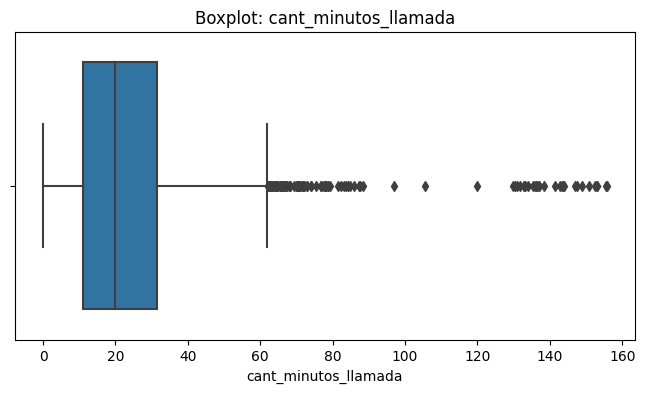


Columna: age_clean
Límite inferior: -12.0
Límite superior: 108.0

Columna: cant_mensajes
Límite inferior: -0.5
Límite superior: 11.5

Columna: cant_llamadas
Límite inferior: -1.5
Límite superior: 10.5

Columna: cant_minutos_llamada
Límite inferior: -19.322500000000005
Límite superior: 61.8575


In [5]:
# Limpiar edad: valores <=0 reemplazados por la mediana de edades válidas
mediana_age = user_profile.loc[user_profile['age'] > 0, 'age'].median()
user_profile['age_clean'] = user_profile['age'].apply(lambda x: mediana_age if x <= 0 else x)

# Columnas a graficar
columnas_numericas = ['age_clean', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# Boxplots
for col in columnas_numericas:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.boxplot(data=user_profile, x=col, ax=ax)
    
    # Limitar eje X para edad a un rango humano
    if col == 'age_clean':
        ax.set_xlim(0, 100)
        titulo = 'Edad de Usuarios'
    else:
        titulo = col
    
    ax.set_title(f'Boxplot: {titulo}')
    ax.set_xlabel(titulo)
    plt.show()

# Calcular límites IQR para detectar outliers
for col in columnas_numericas:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f"\nColumna: {col}")
    print(f"Límite inferior: {limite_inferior}")
    print(f"Límite superior: {limite_superior}")

**Age:** No presenta outliers significativos tras la limpieza; la distribución se concentra en adultos jóvenes y de mediana edad.

**cant_mensajes:** Presenta outliers a la derecha; pocos usuarios envían un volumen muy alto de mensajes, la mayoría se mantiene en niveles bajos a moderados.

**cant_llamadas:** Presenta outliers a la derecha; la mayoría de los usuarios realiza un número moderado de llamadas, con algunos casos de uso intensivo.

**cant_minutos_llamada:** Presenta outliers a la derecha; refleja clientes de alto consumo de minutos, mientras que la mayoría permanece en rangos bajos.

In [7]:
# Columnas para calcular límites IQR
columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
# Calcular límites inferior y superior
for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f"\nColumna: {col}")
    print(f"Límite inferior: {limite_inferior}")
    print(f"Límite superior: {limite_superior}")



Columna: age
Límite inferior: -14.5
Límite superior: 109.5

Columna: cant_mensajes
Límite inferior: -0.5
Límite superior: 11.5

Columna: cant_llamadas
Límite inferior: -1.5
Límite superior: 10.5

Columna: cant_minutos_llamada
Límite inferior: -19.322500000000005
Límite superior: 61.8575


In [8]:
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,33.739750,5.524381,4.478120,23.317054
std,123.232257,2.358416,2.144238,18.168095
min,-999.000000,0.000000,0.000000,0.000000
25%,32.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


**cant_mensajes:** Mantener los outliers. Representan usuarios que envían un volumen muy alto de mensajes; son comportamientos reales y relevantes para segmentación y análisis de consumo.

**cant_llamadas:** Mantener los outliers. Indican clientes que realizan muchas llamadas; reflejan uso intensivo legítimo y aportan valor al análisis de patrones de comunicación.

**cant_minutos_llamada:** Mantener los outliers. Corresponden a usuarios que consumen muchos minutos; son casos reales de alto consumo y no deben eliminarse salvo que afecten modelos específicos.cant_mensajes: Mantener los outliers. Representan usuarios que envían un volumen muy alto de mensajes; son comportamientos reales y relevantes para segmentación y análisis de consumo.

**cant_llamadas:** Mantener los outliers. Indican clientes que realizan muchas llamadas; reflejan uso intensivo legítimo y aportan valor al análisis de patrones de comunicación.

**cant_minutos_llamada:** Mantener los outliers. Corresponden a usuarios que consumen muchos minutos; son casos reales de alto consumo y no deben eliminarse salvo que afecten modelos específicos.


---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.
**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [11]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = np.where(
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    'Bajo uso',
    np.where(
        (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10),
        'Uso medio',
        'Alto uso'
    )
)

# Verificar resultados
user_profile['grupo_uso'].value_counts()

Uso medio    2943
Bajo uso      778
Alto uso      279
Name: grupo_uso, dtype: int64

In [12]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [13]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = np.where(
    user_profile['age'] < 30, 
    'Joven',
    np.where(
        user_profile['age'] < 60,
        'Adulto',
        'Adulto Mayor'
    )
)

# Verificar resultados
user_profile['grupo_edad'].value_counts()

Adulto          1963
Adulto Mayor    1222
Joven            815
Name: grupo_edad, dtype: int64

In [14]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

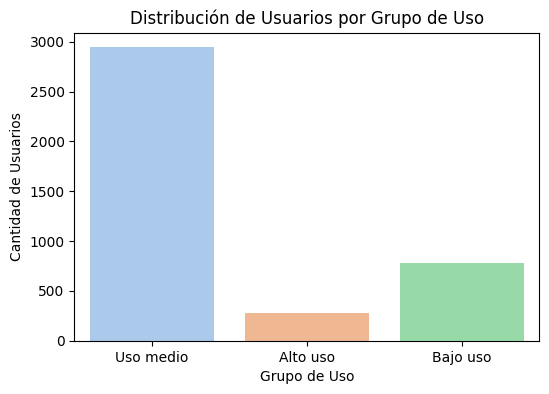

In [15]:
# Gráfico de grupo_uso
plt.figure(figsize=(6,4))
sns.countplot(data=user_profile, x='grupo_uso', palette='pastel')
plt.title('Distribución de Usuarios por Grupo de Uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Cantidad de Usuarios')
plt.show()



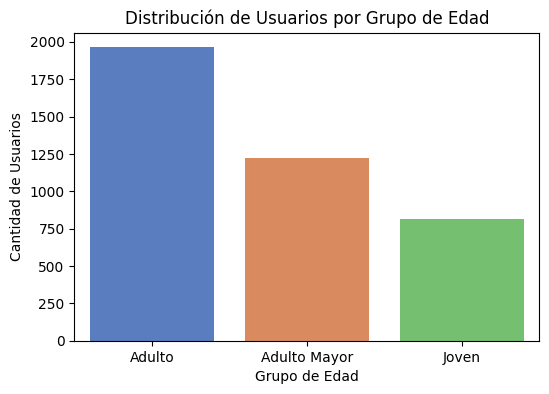

In [16]:
# Gráfico de grupo_edad
plt.figure(figsize=(6,4))
sns.countplot(data=user_profile, x='grupo_edad', palette='muted')
plt.title('Distribución de Usuarios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Usuarios')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**
Los datos originales tenían nulos y valores sentinela en edad, ciudad y duración de uso, que fueron limpiados para análisis confiable. Se identificaron segmentos por edad (Joven, Adulto, Adulto Mayor) y nivel de uso (Bajo, Medio, Alto). Los clientes de alto uso, especialmente jóvenes y adultos, representan el mayor valor económico. Los outliers de mensajes y llamadas reflejan oportunidades reales para planes premium o paquetes adicionales. Se recomienda diseñar planes segmentados por uso y edad, incentivar retención de usuarios intensivos y monitorear continuamente patrones de consumo para ajustar la oferta.

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**

Valores nulos y sentinela en age, city y churn_date fueron identificados y limpiados.

En el dataset de uso, duration y length tenían alto porcentaje de nulos (55% y 45%), considerados Missing At Random y conservados.


🔍 **Segmentos por Edad**

Joven (<30 años): concentran la mayoría de usuarios con uso medio.

Adulto (30–59 años): distribución amplia de bajo a alto uso.

Adulto Mayor (≥60 años): predominan en bajo uso.

📊 **Segmentos por Nivel de Uso**

Bajo uso: pocas llamadas y mensajes, clientes menos rentables.

Uso medio: consumo moderado, usuarios frecuentes.

Alto uso: alto número de llamadas, mensajes y minutos; representan el mayor valor económico.

➡️ Esto sugiere que

Los clientes jóvenes y adultos de alto uso son estratégicamente valiosos.

Los outliers de alto consumo reflejan oportunidades para planes premium o paquetes adicionales.

Se recomienda diseñar planes segmentados por edad y nivel de uso, y monitorear patrones de consumo para optimizar retención y oferta de servicios.




---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`